In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os

from models.vae import VAE

%matplotlib inline

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")

DATA_PATH = r"data/flowers"
SAVE_PATH = "checkpoints/vae_flower.pth"
os.makedirs("checkpoints", exist_ok=True)
BATCH_SIZE = 64
IMG_SIZE = 128
Z_DIM = 128        # Розмір латентного вектора (з скількох чисел складається "сутність" квітки)
EPOCHS = 50
LR = 1e-3



Using device: cuda
GPU Name: NVIDIA GeForce RTX 4060 Laptop GPU


In [3]:
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(DATA_PATH, transform=transform)
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [4]:
def vae_loss_fn(recon_x, x, mu, logvar):
    recon_loss = nn.MSELoss(reduction='sum')(recon_x, x)

    # 2. KL Divergence (формула: наскільки наш розподіл відрізняється від нормального)
    # Це змушує простір бути плавним і без "дірок"
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return recon_loss + kld_loss, recon_loss, kld_loss

Starting training VAE...
Ep 1/50 | Loss: 3132.9 (Rec: 3093.9 + KLD: 39.0)
Ep 2/50 | Loss: 2288.4 (Rec: 2209.2 + KLD: 79.1)
Ep 3/50 | Loss: 1716.0 (Rec: 1605.0 + KLD: 111.0)
Ep 4/50 | Loss: 1551.0 (Rec: 1428.6 + KLD: 122.5)
Ep 5/50 | Loss: 1439.7 (Rec: 1311.0 + KLD: 128.7)


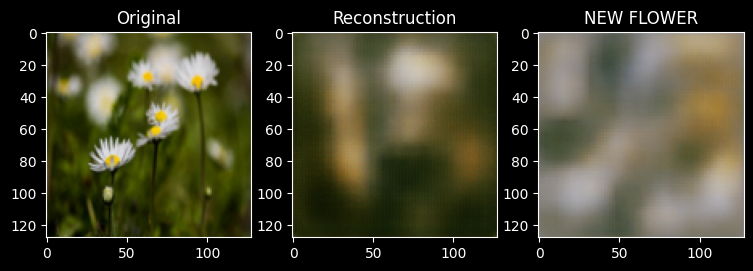

Ep 6/50 | Loss: 1378.5 (Rec: 1246.5 + KLD: 132.0)
Ep 7/50 | Loss: 1321.8 (Rec: 1186.6 + KLD: 135.3)
Ep 8/50 | Loss: 1289.4 (Rec: 1151.5 + KLD: 137.9)
Ep 9/50 | Loss: 1248.5 (Rec: 1108.1 + KLD: 140.4)
Ep 10/50 | Loss: 1214.4 (Rec: 1071.5 + KLD: 142.9)


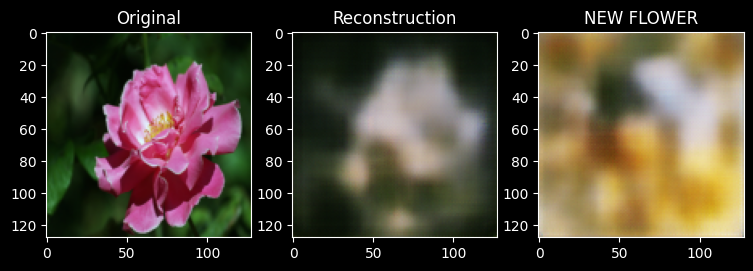

Ep 11/50 | Loss: 1177.0 (Rec: 1031.4 + KLD: 145.5)
Ep 12/50 | Loss: 1123.9 (Rec: 975.4 + KLD: 148.5)
Ep 13/50 | Loss: 1092.2 (Rec: 941.5 + KLD: 150.8)
Ep 14/50 | Loss: 1064.5 (Rec: 911.8 + KLD: 152.7)
Ep 15/50 | Loss: 1050.7 (Rec: 896.0 + KLD: 154.7)


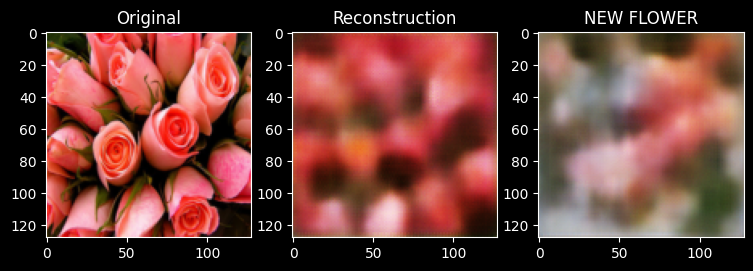

Ep 16/50 | Loss: 1031.4 (Rec: 874.9 + KLD: 156.5)
Ep 17/50 | Loss: 1015.3 (Rec: 857.2 + KLD: 158.1)
Ep 18/50 | Loss: 997.5 (Rec: 837.4 + KLD: 160.0)
Ep 19/50 | Loss: 982.7 (Rec: 821.5 + KLD: 161.3)
Ep 20/50 | Loss: 967.7 (Rec: 804.4 + KLD: 163.3)


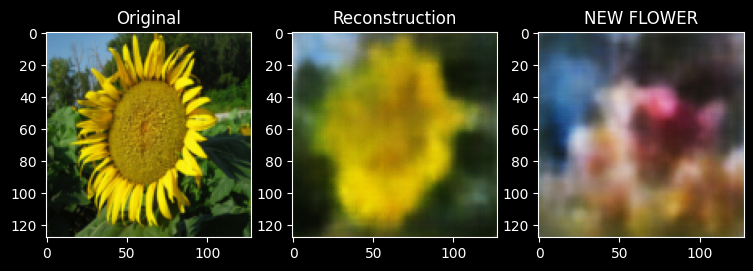

Ep 21/50 | Loss: 969.2 (Rec: 805.2 + KLD: 164.0)
Ep 22/50 | Loss: 939.2 (Rec: 773.5 + KLD: 165.7)
Ep 23/50 | Loss: 931.0 (Rec: 764.6 + KLD: 166.5)
Ep 24/50 | Loss: 910.8 (Rec: 743.0 + KLD: 167.8)
Ep 25/50 | Loss: 896.4 (Rec: 727.5 + KLD: 168.9)


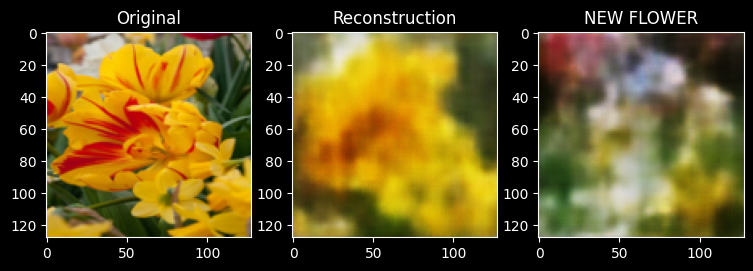

Ep 26/50 | Loss: 889.4 (Rec: 719.5 + KLD: 169.9)
Ep 27/50 | Loss: 875.8 (Rec: 705.2 + KLD: 170.6)
Ep 28/50 | Loss: 866.3 (Rec: 695.0 + KLD: 171.3)
Ep 29/50 | Loss: 865.4 (Rec: 693.3 + KLD: 172.2)
Ep 30/50 | Loss: 852.3 (Rec: 679.5 + KLD: 172.8)


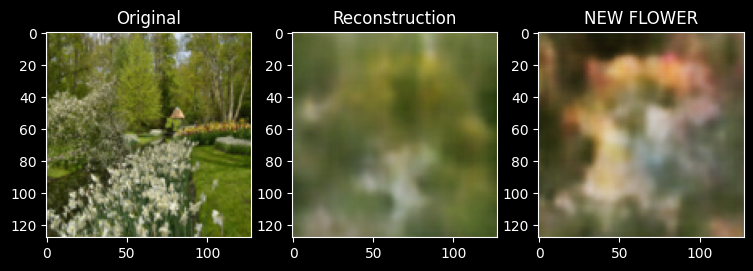

Ep 31/50 | Loss: 848.1 (Rec: 675.1 + KLD: 173.0)
Ep 32/50 | Loss: 834.8 (Rec: 661.2 + KLD: 173.6)
Ep 33/50 | Loss: 826.5 (Rec: 651.8 + KLD: 174.6)
Ep 34/50 | Loss: 829.0 (Rec: 654.2 + KLD: 174.8)
Ep 35/50 | Loss: 812.3 (Rec: 636.5 + KLD: 175.8)


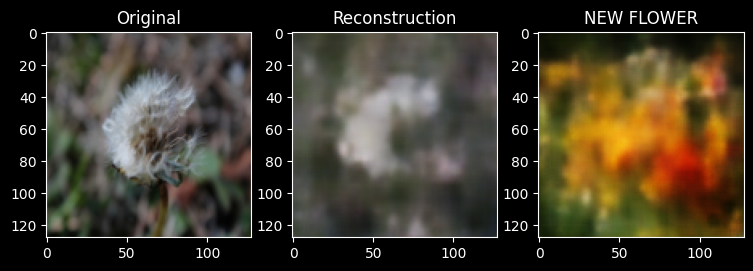

Ep 36/50 | Loss: 807.7 (Rec: 631.6 + KLD: 176.1)
Ep 37/50 | Loss: 804.3 (Rec: 628.0 + KLD: 176.3)
Ep 38/50 | Loss: 793.6 (Rec: 616.6 + KLD: 177.0)
Ep 39/50 | Loss: 788.9 (Rec: 611.7 + KLD: 177.2)
Ep 40/50 | Loss: 786.4 (Rec: 608.5 + KLD: 177.8)


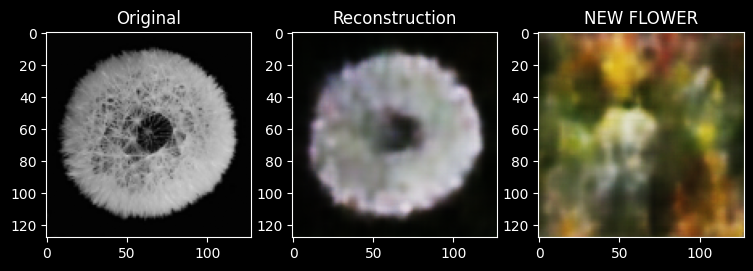

Ep 41/50 | Loss: 784.1 (Rec: 605.7 + KLD: 178.3)
Ep 42/50 | Loss: 778.3 (Rec: 599.8 + KLD: 178.5)
Ep 43/50 | Loss: 776.3 (Rec: 597.9 + KLD: 178.4)
Ep 44/50 | Loss: 768.4 (Rec: 589.6 + KLD: 178.8)
Ep 45/50 | Loss: 758.8 (Rec: 579.4 + KLD: 179.4)


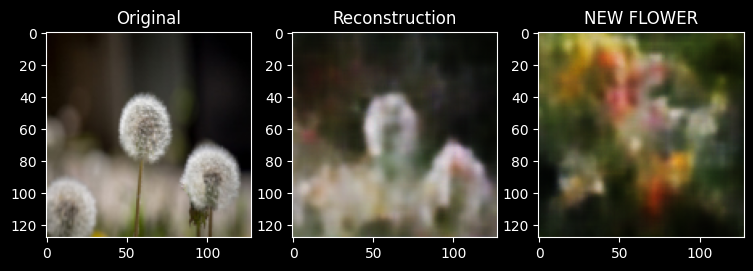

Ep 46/50 | Loss: 758.0 (Rec: 578.6 + KLD: 179.4)
Ep 47/50 | Loss: 758.7 (Rec: 579.2 + KLD: 179.5)
Ep 48/50 | Loss: 749.4 (Rec: 569.4 + KLD: 180.0)
Ep 49/50 | Loss: 744.0 (Rec: 564.0 + KLD: 180.0)
Ep 50/50 | Loss: 745.7 (Rec: 565.1 + KLD: 180.6)


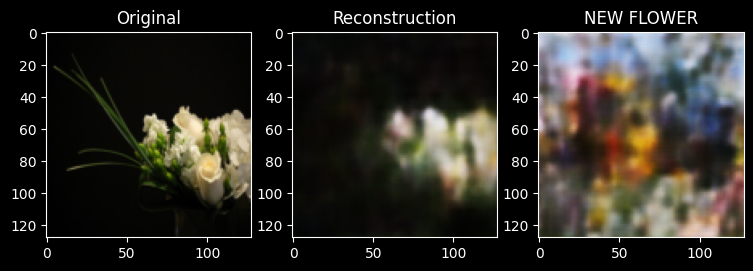

VAE Model saved!


In [5]:
model = VAE(z_dim=Z_DIM).to(device)
optimizer = optim.Adam(model.parameters(), lr=LR)

print("Starting training VAE...")

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    total_recon = 0
    total_kld = 0

    for imgs, _ in data_loader:
        imgs = imgs.to(device)

        optimizer.zero_grad()

        # VAE повертає 3 значення
        recon_imgs, mu, logvar = model(imgs)

        loss, r_loss, k_loss = vae_loss_fn(recon_imgs, imgs, mu, logvar)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_recon += r_loss.item()
        total_kld += k_loss.item()

    # Статистика за епоху
    avg_loss = total_loss / len(dataset)
    avg_recon = total_recon / len(dataset)
    avg_kld = total_kld / len(dataset)

    print(f"Ep {epoch+1}/{EPOCHS} | Loss: {avg_loss:.1f} (Rec: {avg_recon:.1f} + KLD: {avg_kld:.1f})")

    if (epoch+1) % 5 == 0:
        model.eval()
        with torch.no_grad():
            sample = imgs[0:1]
            recon, _, _ = model(sample)

            # Генеруємо випадковий вектор (шум)
            z = torch.randn(1, Z_DIM).to(device)
            z = model.fc_decode(z)
            z = z.view(-1, 256, 8, 8)
            generated = model.decoder(z)

            plt.figure(figsize=(9, 3))
            plt.subplot(1,3,1); plt.imshow(sample[0].cpu().permute(1,2,0)); plt.title("Original")
            plt.subplot(1,3,2); plt.imshow(recon[0].cpu().permute(1,2,0)); plt.title("Reconstruction")
            plt.subplot(1,3,3); plt.imshow(generated[0].cpu().permute(1,2,0)); plt.title("NEW FLOWER")
            plt.show()

# Збереження
torch.save(model.state_dict(), SAVE_PATH)
print("VAE Model saved!")

1. Reconstruction check (Does the model remember the flowers?)


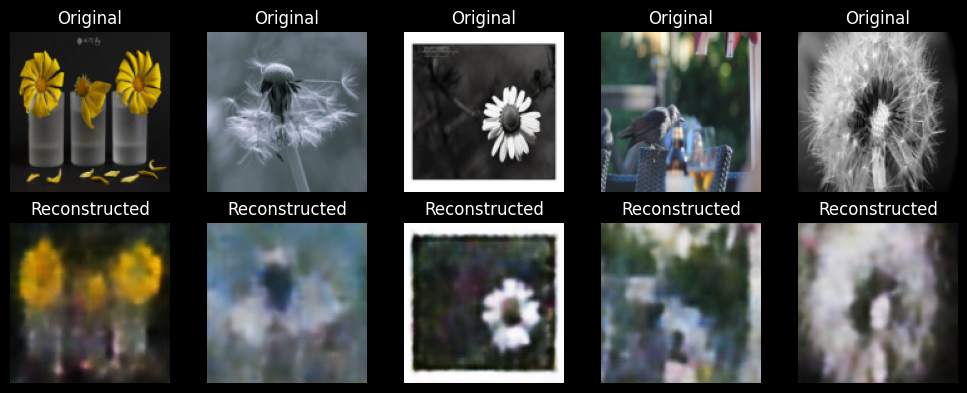


2.Generation (Creating New Species)...


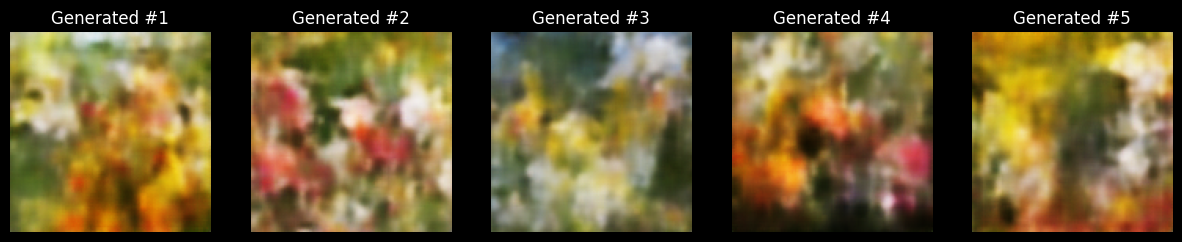

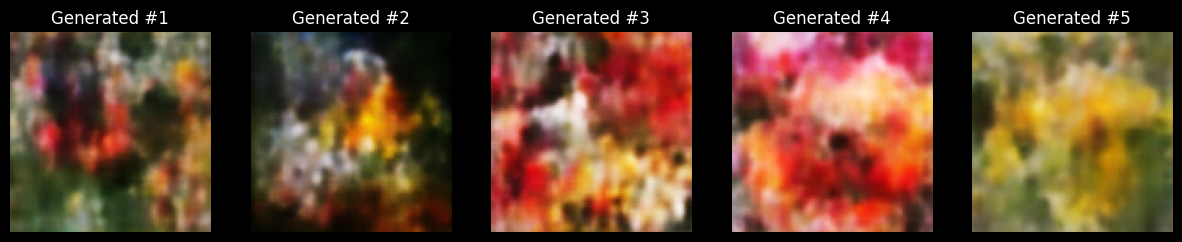

In [6]:

model.eval()
print("1. Reconstruction check (Does the model remember the flowers?)")

dataiter = iter(data_loader)
images, labels = next(dataiter)
images = images.to(device)

with torch.no_grad():
    recon_imgs, mu, logvar = model(images)

plt.figure(figsize=(10, 4))
for i in range(5):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].cpu().permute(1, 2, 0))
    plt.title("Original")
    plt.axis("off")

    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(recon_imgs[i].cpu().permute(1, 2, 0))
    plt.title("Reconstructed")
    plt.axis("off")
plt.tight_layout()
plt.show()

print("\n2.Generation (Creating New Species)...")

def generate_new_flowers(n=5):
    plt.figure(figsize=(15, 3))
    with torch.no_grad():
        for i in range(n):
            z = torch.randn(1, Z_DIM).to(device)

            z = model.fc_decode(z)
            z = z.view(-1, 256, 8, 8)
            generated_img = model.decoder(z)

            ax = plt.subplot(1, n, i + 1)
            plt.imshow(generated_img[0].cpu().permute(1, 2, 0))
            plt.title(f"Generated #{i+1}")
            plt.axis("off")
    plt.show()

generate_new_flowers(5)
generate_new_flowers(5)